In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('customer_data_edited.csv')

print(str(data.shape) + '\n')

data.head()

(12892, 22)



,recordID,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,customer_id
0,1,HI,101,510,no,no,0,70.9,123,12.05,...,18.01,236.0,73,10.62,10.6,3,2.86,3,no,23383607.0
1,2,MT,137,510,no,no,0,223.6,86,38.01,...,20.81,94.2,81,4.24,9.5,7,2.57,0,no,22550362.0
2,3,OH,103,408,no,yes,29,294.7,95,50.10,...,20.17,300.3,127,13.51,13.7,6,3.70,1,no,59063354.0
3,4,NM,99,415,no,no,0,216.8,123,36.86,...,10.74,220.6,82,9.93,15.7,2,4.24,1,no,25464504.0
4,5,SC,108,415,no,no,0,197.4,78,33.56,...,10.54,204.5,107,9.20,7.7,4,2.08,2,no,691824.0


In [3]:
#Eliminamos columna de ID
data.drop(['recordID', 'customer_id'], axis = 1, inplace=True)
print(str(data.shape) + '\n')

(12892, 20)



### 2. Análisis de Datos para toma de decisiones en Feature Engineering Pipeline

#### 2.1 Análisis del target

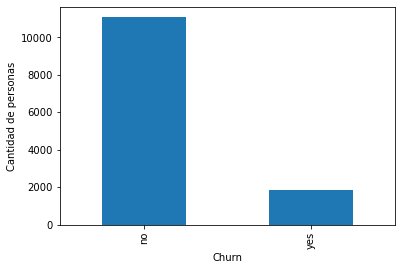

In [4]:
data['churn'].value_counts().plot(kind="bar")
plt.xlabel('Churn')
plt.ylabel('Cantidad de personas')
plt.show()

* La data está desbalanceada. Se procederá a hacer un balanceo.

### 2.3. Verificamos tipos de variables en X

#### 2.3.1 Variables categóricas

In [5]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

#Agregamos el caso especial de MSSubClass ya que por definición es categórica
cat_vars = cat_vars + ['area_code']

In [6]:
#Cantidad de variables categóricas
len(cat_vars)

5

In [7]:
data[cat_vars] = data[cat_vars].astype('O')

In [8]:
data[cat_vars] = data[cat_vars]

In [9]:
data[cat_vars].dtypes

state                 object
international_plan    object
voice_mail_plan       object
churn                 object
area_code             object
dtype: object

#### 2.3.2. Variables numéricas

In [10]:
#Variables numéricas
num_vars = [var for var in data.columns if(var not in cat_vars)]

In [11]:
data[num_vars].dtypes

account_length                     int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

In [12]:
len(num_vars)

15

### 2.4 Análisis de valores faltantes

In [13]:
var_with_na = [var for var in data.columns if(data[var].isnull().sum() > 0)]
len(var_with_na)

0

* No hay valores faltantes

### 2.5 Variables Discretas

In [14]:
discrete_vars = [var for var in num_vars if((len(data[var].unique()) < 20))]
discrete_vars

['number_customer_service_calls']

In [15]:
print('Cantidad de Variables Discretas: ', len(discrete_vars))

Cantidad de Variables Discretas:  1


In [16]:
data[discrete_vars].head()

,number_customer_service_calls
0,3
1,0
2,1
3,1
4,2
